In [1]:
import numpy as np
from matplotlib import pyplot as plt
from orbit.orbits import Orbit

In [2]:
# set params
aa = 0.998
slr = 3
ecc = 0
x = 1
en = 0
ell = 2
em = 2
kay = 0

In [3]:
orbit1 = Orbit(aa, slr, ecc, x)

In [4]:
orbit1.energy_inf(ell=ell, em=em, en=en, kay=kay)

0.007335091090038833

In [4]:
res_list = []
for en in range(-5, 7):
    E_inf = orbit1.energy_inf(ell=2, em=2, en=en)
    results = [ell, em, en, E_inf]
    print(results)
    res_list.append(results)
results = np.array(res_list)

[2, 2, -5, 9.107497208449865e-13]
[2, 2, -4, 4.586845797954055e-12]
[2, 2, -3, 2.260701112660885e-15]
[2, 2, -2, 2.0718310050432755e-08]
[2, 2, -1, 1.0774978288046475e-05]
[2, 2, 0, 6.224780486839618e-05]
[2, 2, 1, 0.00010477083631466794]
[2, 2, 2, 5.65867606569314e-05]
[2, 2, 3, 1.8728767107924123e-05]
[2, 2, 4, 4.648328042171159e-06]
[2, 2, 5, 9.502138623055974e-07]
[2, 2, 6, 1.6860631719962333e-07]


<BarContainer object of 12 artists>

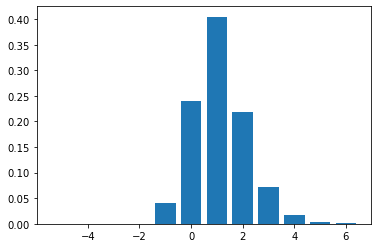

In [5]:
plt.bar(results[:, 2], results[:, 3]/ np.sum(results[:, 3]))